<a href="https://colab.research.google.com/github/Ekazia88/Praktikum_KB/blob/master/P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### POSTTEST 7

buat folder untuk api kaggle

In [6]:
!mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


copy file kaggle.json ke folder kaggle tadi

In [7]:
!cp kaggle.json ~/.kaggle/

download datasets

In [8]:
!kaggle datasets download -d balabaskar/tom-and-jerry-image-classification

100% 433M/435M [00:10<00:00, 46.9MB/s]
100% 435M/435M [00:10<00:00, 45.3MB/s]


unzip datasets

In [9]:
!unzip tom-and-jerry-image-classification.zip -d tom_and_jerry

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2793.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2794.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2795.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2796.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2797.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2798.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2799.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2800.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2801.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2802.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2803.jpg  
  inflating: tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame2804.jpg  
  inflating: tom_

melakukan import file yg diperlukan

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt

membuat lokasi folder datasets

In [43]:
path = '/content/tom_and_jerry/tom_and_jerry/tom_and_jerry'

In [44]:
import os

melihat class yang ada di gambar

In [45]:
kategori = os.listdir(path)
kategori

['tom_jerry_1', 'tom', 'jerry', 'tom_jerry_0']

In [46]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [47]:
path_gmb = '/content/tom_and_jerry/tom_and_jerry/tom_and_jerry/jerry/frame100.jpg'

membuat contoh augmentasi gambar

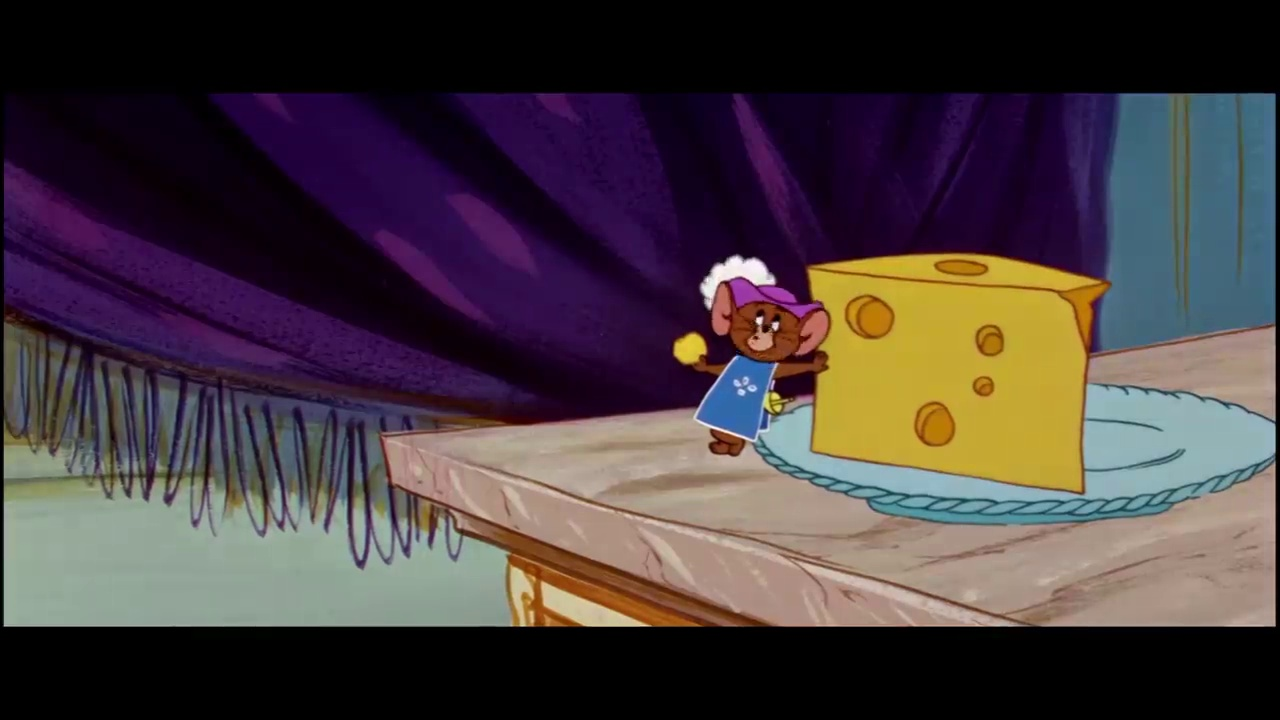

In [48]:
image = load_img(path_gmb)
image

In [49]:
bright = random_brightness(image, max_delta=2.0);

Text(0.5, 1.0, 'gambar sebelum augmentasi')

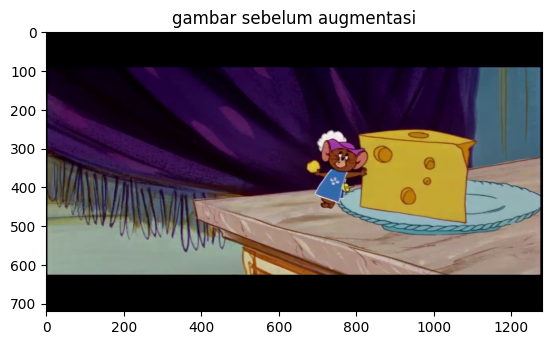

In [50]:
plt.imshow(image)
plt.title('gambar sebelum augmentasi')

Text(0.5, 1.0, 'gambar setelah augmentasi')

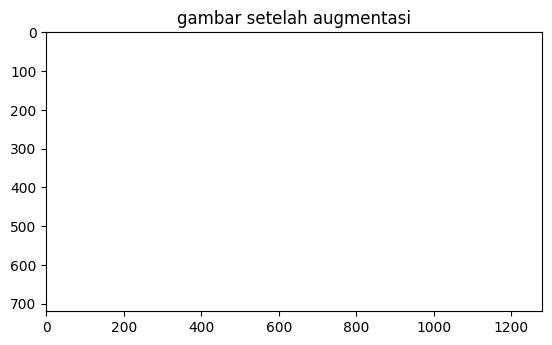

In [51]:
plt.imshow(bright.numpy().astype('uint8'))
plt.title('gambar setelah augmentasi')

# membuat data split ke val ,train test


In [52]:
train_dir ='/content/tom_and_jerry/tom_and_jerry/tom_and_jerry'
val_dir = '/content/tom_and_jerry/tom_and_jerry/tom_and_jerry'
test_dir = '/content/tom_and_jerry/tom_and_jerry/tom_and_jerry'

membuat datagen

In [53]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,

    shear_range = 0.1,
    width_shift_range = 0.3,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,

    validation_split = 0.2
)
val_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.2
)

train,test,val dataset

In [54]:
test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5478 images belonging to 4 classes.


In [55]:
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

Found 4383 images belonging to 4 classes.


In [56]:
validation_dataset = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1095 images belonging to 4 classes.


memlihat class dari trainnya

In [57]:
train_dataset.class_indices

{'jerry': 0, 'tom': 1, 'tom_jerry_0': 2, 'tom_jerry_1': 3}

# Melakukan Pelatihan Model menggunakan VGG16

In [58]:
model = Sequential()

In [59]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
optimizers = optimizers.Adam(learning_rate=0.0002)

In [61]:
model.compile(optimizer=optimizers, loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Membuat callbacks

In [63]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

melakukan fitting

In [67]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[early_stopping,reduce_lr]
)

Epoch 1/10
137/137 [==============================] - 46s 335ms/step - loss: 0.5626 - accuracy: 0.7500 - val_loss: 0.5626 - val_accuracy: 0.7500 - lr: 2.0000e-04
Epoch 2/10
137/137 [==============================] - 48s 349ms/step - loss: 0.5626 - accuracy: 0.7500 - val_loss: 0.5626 - val_accuracy: 0.7500 - lr: 2.0000e-04
Epoch 3/10
137/137 [==============================] - 47s 342ms/step - loss: 0.5626 - accuracy: 0.7500 - val_loss: 0.5625 - val_accuracy: 0.7500 - lr: 2.0000e-04
Epoch 4/10
137/137 [==============================] - 48s 351ms/step - loss: 0.5625 - accuracy: 0.7500 - val_loss: 0.5625 - val_accuracy: 0.7500 - lr: 2.0000e-04
Epoch 5/10
137/137 [==============================] - 48s 352ms/step - loss: 0.5625 - accuracy: 0.7500 - val_loss: 0.5625 - val_accuracy: 0.7500 - lr: 2.0000e-05
Epoch 6/10
137/137 [==============================] - 49s 355ms/step - loss: 0.5624 - accuracy: 0.7500 - val_loss: 0.5625 - val_accuracy: 0.7500 - lr: 2.0000e-05
Epoch 7/10
137/137 [========

Melakukan Evaluasi Model

In [68]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

172/172 [==============================] - 23s 132ms/step - loss: 1.7539 - accuracy: 0.2261
Akurasi pada data test: 0.23


# Grafik

menampilkan model akurasi

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

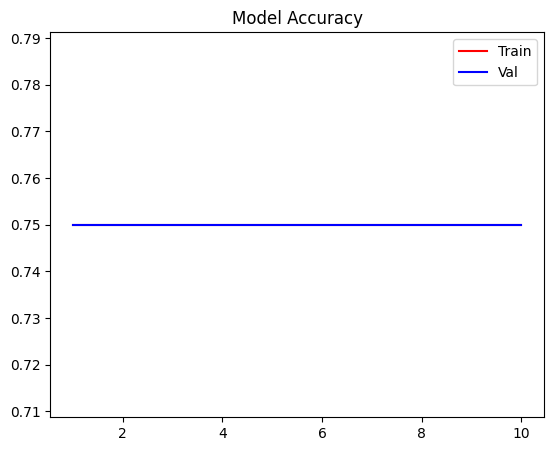

In [70]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

Grafik Model Loss

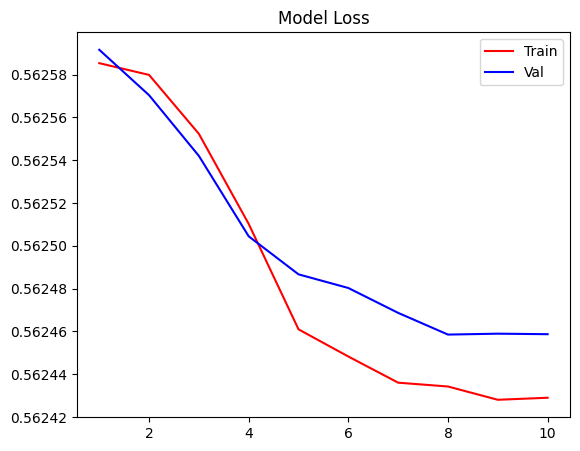

In [71]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()